# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
nutri = pd.read_csv('/Users/carlosoliver/Desktop/BOOTCAMP/DataScience-Mar2024/3-Machine_Learning/2-No_Supervisado/1-PCA/Practica/data/nndb_flat.csv', sep=',')

In [3]:
nutri

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [4]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [12]:
nutri_n = nutri.iloc[:,7:]

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

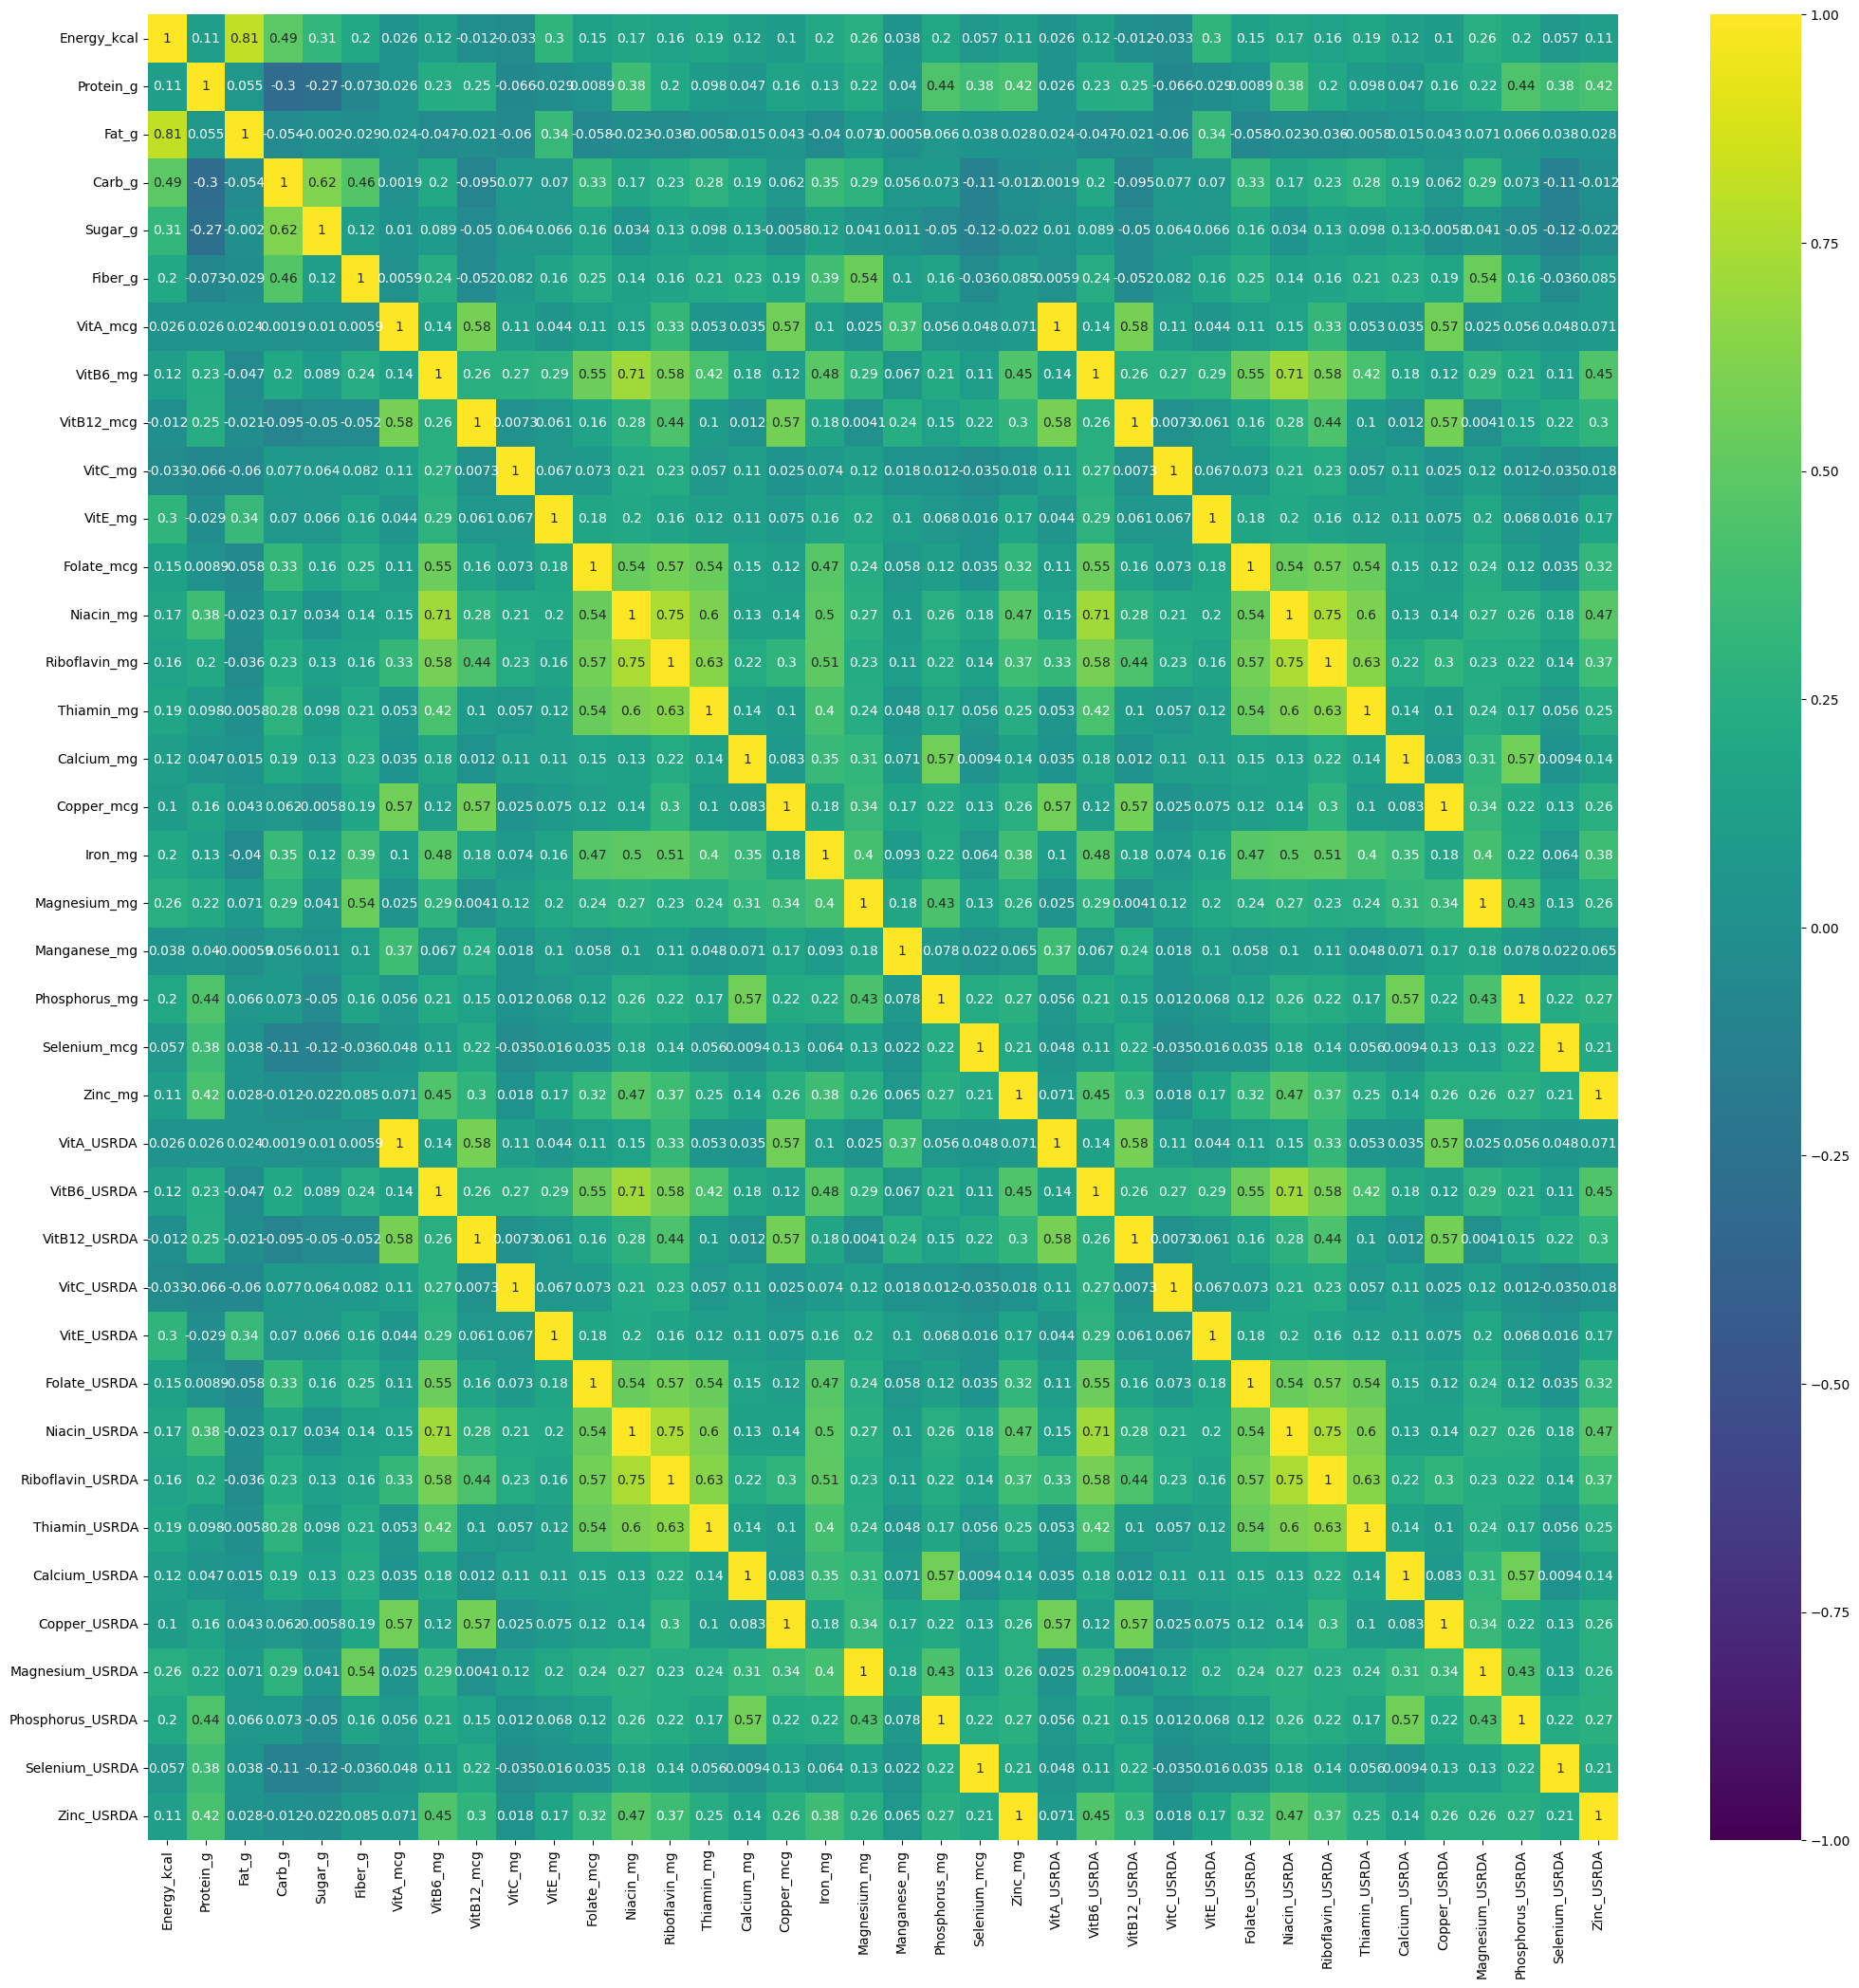

In [16]:
# Haz un heatmap de 25 x 25 inches
plt.figure(figsize=(25, 25))
sns.heatmap(nutri_n.corr(), annot=True, vmin=-1, vmax=1, cmap='viridis')

# intenta fijar el valor mínimo en -1 y el valor máximo en 1


# prueba a personalizarlo a tu gusto, no es necesario que quede igual que el ejemplo

In [18]:
# ¿Cuántas columnas contienen 'USRDA'?
# Obtener todas las columnas que contienen 'USRDA'
columns_with_USRDA = [col for col in nutri_n.columns if 'USRDA' in col]

# Mostrar las columnas que contienen 'USRDA'
print(columns_with_USRDA)


['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA']


In [21]:
# df.columns
nutri_n.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [22]:
# dropea las columnas que contengan 'USRDA'
nutri_n.drop(columns=columns_with_USRDA, inplace=True)


In [23]:
nutri_n

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### Variables no numéricas
Elimina las variables de texto del dataset

In [61]:
# revisa los tipos del dataset resultante

In [25]:
nutri_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

In [29]:
# elimina las variables de texto
# Seleccionar solo las columnas numéricas
numeric_columns = nutri_n.select_dtypes(include='number').columns

# Eliminar las variables de texto
nutri_n = nutri_n[numeric_columns]
nutri_n.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [30]:
# Sumar 1 a todas las variables
df_transformed = nutri_n + 1

# Aplicar la transformación logarítmica a todas las variables
df_transformed = np.log(df_transformed)


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [35]:
# Instancia un Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

In [37]:
# Muestra el primer array resultante, verás que tiene 23 valores para nuestras 23 columnas
df_scaled[0]

array([ 1.54041394, -1.37969871,  2.22252572, -1.27933898, -0.75138074,
       -0.81781776,  2.36310494, -0.81136575, -0.45374885, -0.63501951,
        1.60542126, -0.38020629, -1.27804706, -0.68561875, -0.68260208,
        0.04349064, -0.6242369 , -1.2909693 , -1.3236149 , -0.47829422,
       -0.60719321, -0.7007746 , -1.02653251])

array([ 1.54041394, -1.37969871,  2.22252572, -1.27933898, -0.75138074,
       -0.81781776,  2.36310494, -0.81136575, -0.45374885, -0.63501951,
        1.60542126, -0.38020629, -1.27804706, -0.68561875, -0.68260208,
        0.04349064, -0.6242369 , -1.2909693 , -1.3236149 , -0.47829422,
       -0.60719321, -0.7007746 , -1.02653251])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [38]:
# comprueba el shape de tu dataframe
df_scaled.shape

(8618, 23)

(8618, 23)

In [40]:
# Instancia un PCA sin argumentos iniciales
from sklearn.decomposition import PCA


# Entrena con el df estandarizado, transforma y obtén el shape del array resultante

pca = PCA(n_components=23)
converted_data = pca.fit_transform(df_scaled)

converted_data.shape

(8618, 23)

(8618, 23)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [48]:
# usa el método explained_variance_ratio y haz una suma acumulativa

suma_acu = pca.explained_variance_ratio_.cumsum()

In [49]:
suma_acu

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

<Axes: >

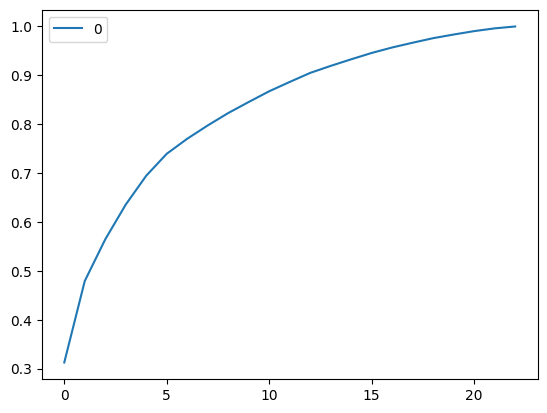

In [50]:
# plotea la suma acumulativa según el número de componentes

sns.lineplot([suma_acu])

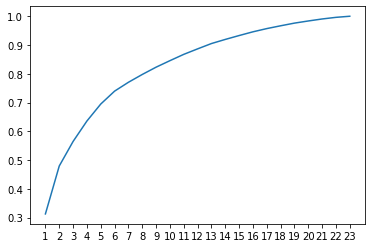

In [51]:
# Nos quedamos con 6 PCs para casi un 80% de la varianza original
pca = PCA(n_components=6)



## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [58]:
# Instancia un nuevo PCA con n_components=6

converted_data = pca.fit_transform(df_scaled)

converted_data.shape

# Entrena, transforma y obtén el shape

(8618, 6)

In [59]:
converted_data

array([[-2.1390317 , -0.968019  , -1.46396697,  0.27086607,  4.06658507,
         0.3070486 ],
       [-2.10648538, -0.9095018 , -1.48058214,  0.26326888,  4.03240614,
         0.34905637],
       [-3.26782986, -1.13842932, -2.04236748,  1.17549522,  4.07184036,
         1.32748179],
       ...,
       [-2.93053168,  1.6643986 , -1.24236308,  1.17300842, -0.91124137,
        -0.87583834],
       [ 1.11889397, -0.78083781,  0.80494574, -1.58148822,  1.64421085,
         1.09559772],
       [ 0.37955013, -1.27668642,  1.59189707, -1.23562223,  0.71900526,
        -0.63904291]])

PCA(n_components=6)

In [60]:
# Monta un dataframe con los resultado y las columnas 'PC1','PC2','PC3','PC4','PC5','PC6'
converted_data = pd.DataFrame(converted_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
converted_data

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,-1.463967,0.270866,4.066585,0.307049
1,-2.106485,-0.909502,-1.480582,0.263269,4.032406,0.349056
2,-3.267830,-1.138429,-2.042367,1.175495,4.071840,1.327482
3,1.525965,-1.264099,0.136039,-0.929902,2.429694,-2.097143
4,1.240713,-1.204117,0.004799,-1.192122,2.690102,-2.344969
...,...,...,...,...,...,...
8613,2.553662,-2.548705,0.472461,-0.109743,2.713633,0.015240
8614,0.075019,-1.840927,0.935905,-1.349033,-0.393856,-0.761344
8615,-2.930532,1.664399,-1.242363,1.173008,-0.911241,-0.875838
8616,1.118894,-0.780838,0.804946,-1.581488,1.644211,1.095598


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [79]:
# Necesitaremos la serie FoodGroup
food = nutri['FoodGroup'].unique()

food_df = pd.DataFrame({'FoodGroup': food})


In [80]:
food_df

,FoodGroup
0,Dairy and Egg Products
1,Spices and Herbs
2,Baby Foods
3,Fats and Oils
4,Poultry Products
5,"Soups, Sauces, and Gravies"
6,Sausages and Luncheon Meats
7,Breakfast Cereals
8,Snacks
9,Fruits and Fruit Juices


,FoodGroup
0,Dairy and Egg Products
1,Dairy and Egg Products
2,Dairy and Egg Products
3,Dairy and Egg Products
4,Dairy and Egg Products
...,...
8613,Finfish and Shellfish Products
8614,Finfish and Shellfish Products
8615,Sweets
8616,Finfish and Shellfish Products


In [84]:
# Unimos la serie de grupos de comida (FoodGroup) con nuestro df final, prueba a hacer un merge
final_df = pd.merge(food_df, converted_data, left_index=True, right_index=True)
final_df

,FoodGroup,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,-2.139032,-0.968019,-1.463967,0.270866,4.066585,0.307049
1,Spices and Herbs,-2.106485,-0.909502,-1.480582,0.263269,4.032406,0.349056
2,Baby Foods,-3.267830,-1.138429,-2.042367,1.175495,4.071840,1.327482
3,Fats and Oils,1.525965,-1.264099,0.136039,-0.929902,2.429694,-2.097143
4,Poultry Products,1.240713,-1.204117,0.004799,-1.192122,2.690102,-2.344969
5,"Soups, Sauces, and Gravies",1.449418,-1.467199,0.369671,-0.444498,2.275287,-1.543232
6,Sausages and Luncheon Meats,1.479598,-1.376018,0.541814,-0.757426,2.423727,-1.914737
7,Breakfast Cereals,1.259000,-1.135445,-0.060089,-1.338780,2.243696,-2.501690
8,Snacks,1.527193,-1.335990,-0.048442,-1.408900,3.125198,-1.955749
9,Fruits and Fruit Juices,1.060788,-1.231811,-0.095126,-1.423678,2.353011,-2.444876


In [130]:
# df_final_merged = pd.merge(food, df_pca, left_index=True, right_index=True)
# Best way

,FoodGroup,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,-2.139032,-0.968019,-1.463967,0.270851,4.067039,0.306874
1,Dairy and Egg Products,-2.106485,-0.909502,-1.480567,0.263221,4.032494,0.348373
2,Dairy and Egg Products,-3.267830,-1.138430,-2.042335,1.175411,4.071730,1.326500
3,Dairy and Egg Products,1.525964,-1.264102,0.136046,-0.929817,2.430482,-2.095504
4,Dairy and Egg Products,1.240712,-1.204120,0.004784,-1.192000,2.691787,-2.342385
...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,2.553661,-2.548702,0.472283,-0.109458,2.716705,0.017503
8614,Finfish and Shellfish Products,0.075018,-1.840923,0.935789,-1.348908,-0.391982,-0.760173
8615,Sweets,-2.930529,1.664406,-1.242112,1.172462,-0.915640,-0.884892
8616,Finfish and Shellfish Products,1.118895,-0.780833,0.805093,-1.581764,1.641611,1.091033


In [132]:
# de nada :)
# for columnName in df_final_merged[['PC1','PC2','PC3','PC4','PC5','PC6']].columns:
#     df_final_merged.sort_values(by=columnName, ascending=False, inplace=True)
#     print(columnName)
#     print(df_final_merged['FoodGroup'][:3])
#     print("-"*50)

PC1
1832    Breakfast Cereals
1863    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC2
4190                            Beverages
3577    Vegetables and Vegetable Products
3320    Vegetables and Vegetable Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC3
8537                        Beverages
4355                        Beverages
5277    Lamb, Veal, and Game Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC4
1850    Breakfast Cereals
1867    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC5
776    Fats and Oils
632    Fats and Oils
786    Fats and Oils
Name: FoodGroup, dtype: object
--------------------------------------------------
PC6
7457    Beef Products
7458    Beef Products
4190        Beverages
Name: FoodGroup, dtype: object
----------